In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing Data Sets
path = r'/Users/mariazaremba/Documents/CareerFoundry/Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_exercise_4_10.pkl'))

In [3]:
# Group the data by user_id and loyalty_flag and count the occurrences
loyalty_counts = df.groupby(['user_id', 'loyalty_flag']).size().unstack(fill_value=0)

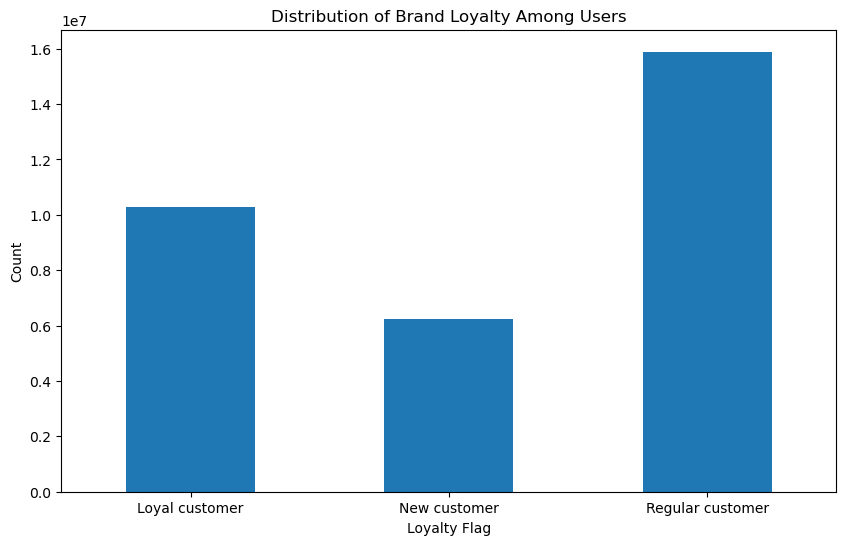

In [4]:
# Plot the distribution of loyalty flags
loyalty_counts.sum().plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Brand Loyalty Among Users')
plt.xlabel('Loyalty Flag')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_counts.png'))
plt.show()

In [5]:
# Group the data by loyalty status and analyze ordering habits
loyalty_stats = df.groupby('loyalty_flag').agg({
    'order_number': 'mean',  # Average number of orders
    'days_since_prior_order': 'mean',  # Average order frequency
    'prices': 'mean'  # Average expenditure
}).reset_index()

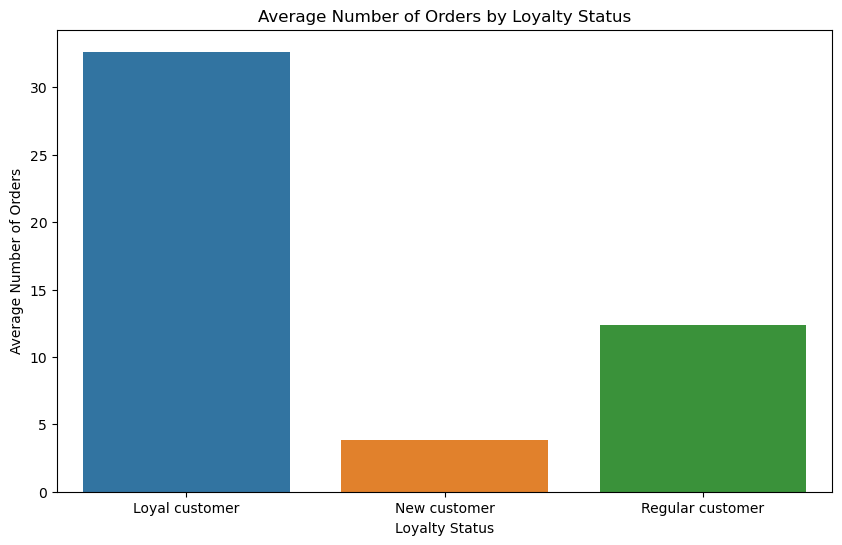

In [6]:
# Visualize the differences in ordering habits
plt.figure(figsize=(10, 6))
sns.barplot(data=loyalty_stats, x='loyalty_flag', y='order_number')
plt.title('Average Number of Orders by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Average Number of Orders')
plt.show()

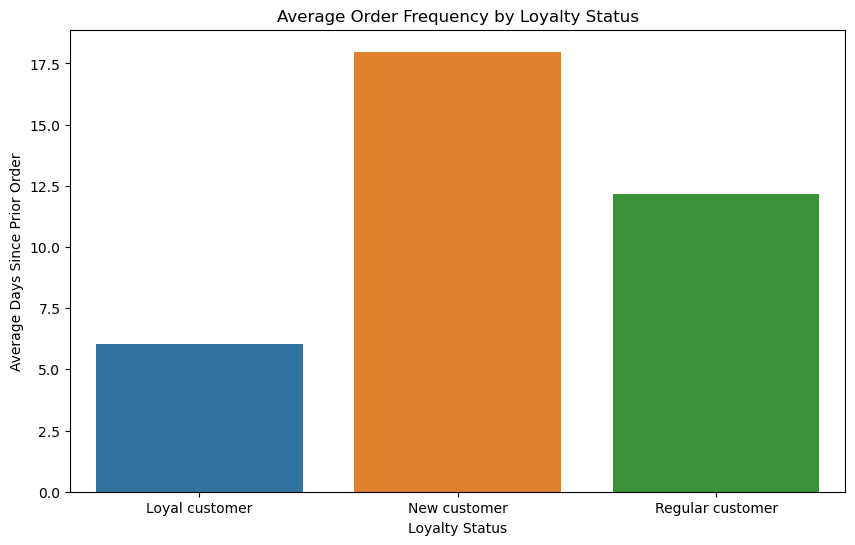

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(data=loyalty_stats, x='loyalty_flag', y='days_since_prior_order')
plt.title('Average Order Frequency by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Average Days Since Prior Order')
plt.show()

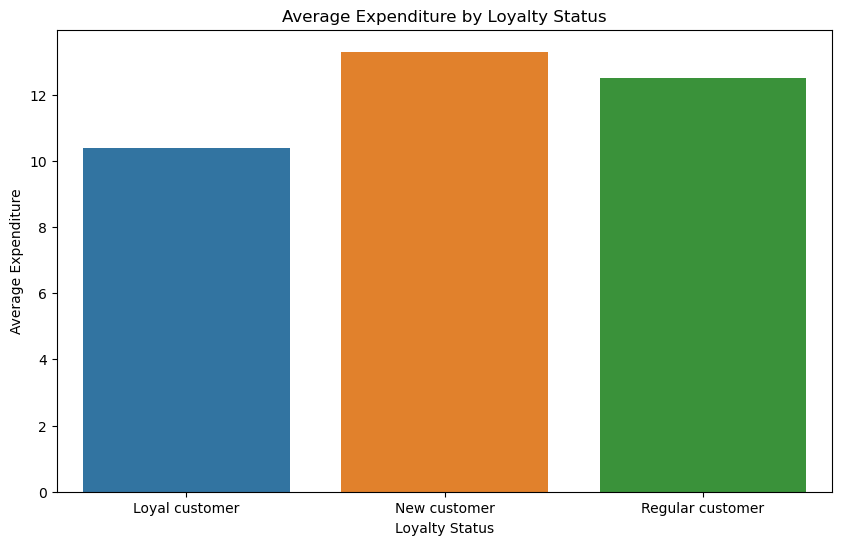

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(data=loyalty_stats, x='loyalty_flag', y='prices')
plt.title('Average Expenditure by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Average Expenditure')
plt.show()

In [9]:
# Group the data by region and analyze ordering habits
region_stats = df.groupby('region').agg({
    'order_number': 'mean',  # Average number of orders
    'days_since_prior_order': 'mean',  # Average order frequency
    'prices': 'mean'  # Average expenditure
}).reset_index()

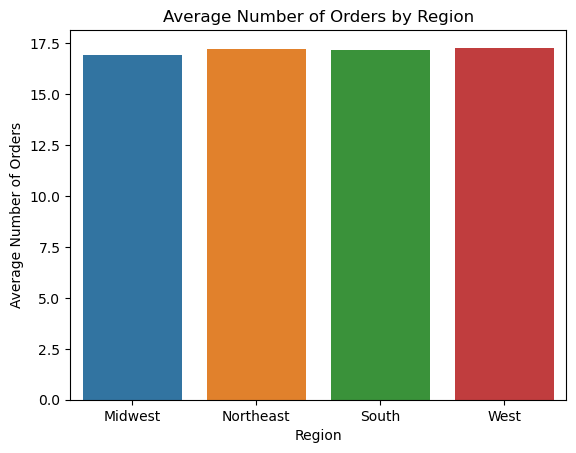

In [10]:
# Visualize the differences in ordering habits
# plt.figure(figsize=(10, 6))
sns.barplot(data=region_stats, x='region', y='order_number')
plt.title('Average Number of Orders by Region')
plt.xlabel('Region')
plt.ylabel('Average Number of Orders')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

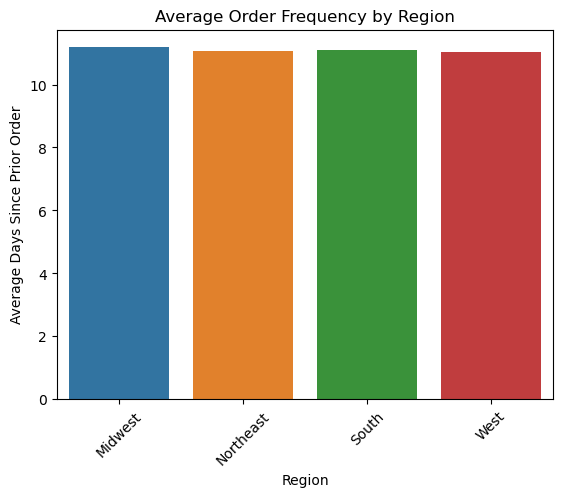

In [11]:
# plt.figure(figsize=(10, 6))
sns.barplot(data=region_stats, x='region', y='days_since_prior_order')
plt.title('Average Order Frequency by Region')
plt.xlabel('Region')
plt.ylabel('Average Days Since Prior Order')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

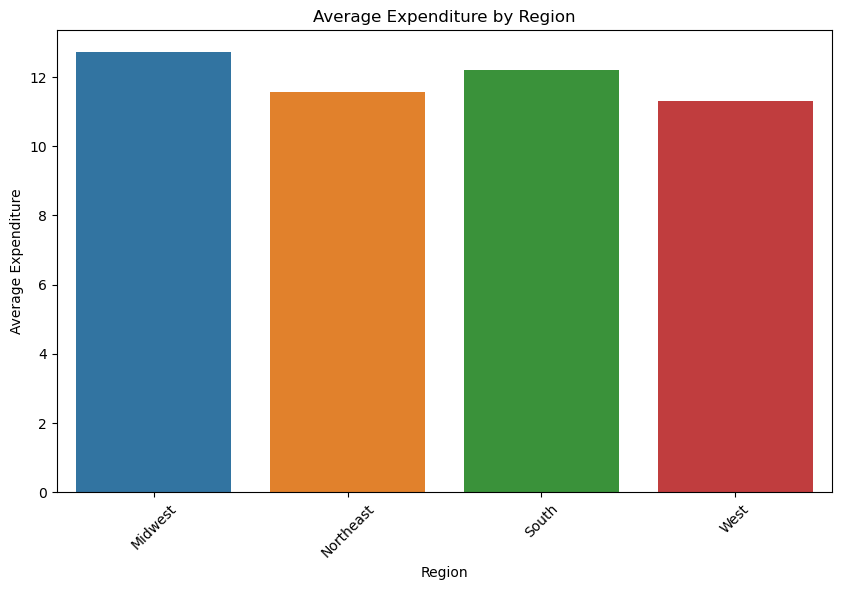

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=region_stats, x='region', y='prices')
plt.title('Average Expenditure by Region')
plt.xlabel('Region')
plt.ylabel('Average Expenditure')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [13]:
age_family_stats = df.groupby(['age', 'family_status']).agg({
    'order_number': 'mean',  # Average number of orders
    'days_since_prior_order': 'mean',  # Average order frequency
    'prices': 'mean'  # Average expenditure
}).reset_index()

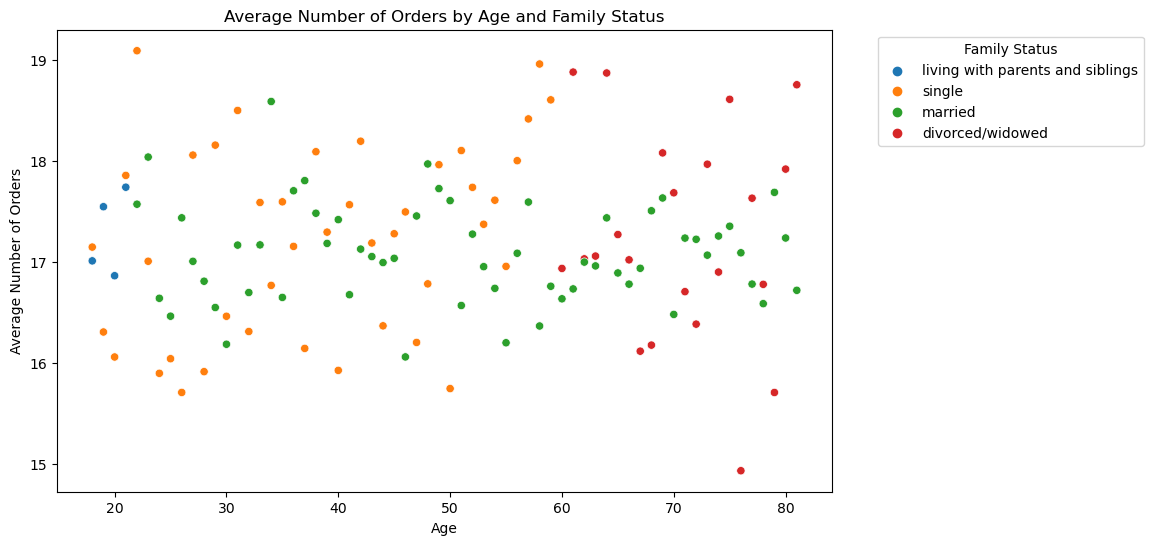

In [14]:
# Visualize the relationship between age, family status, and ordering habits
plt.figure(figsize=(10, 6))
sns.scatterplot(data=age_family_stats, x='age', y='order_number', hue='family_status')
plt.title('Average Number of Orders by Age and Family Status')
plt.xlabel('Age')
plt.ylabel('Average Number of Orders')
plt.legend(title='Family Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_family_stats.png'))
plt.show()

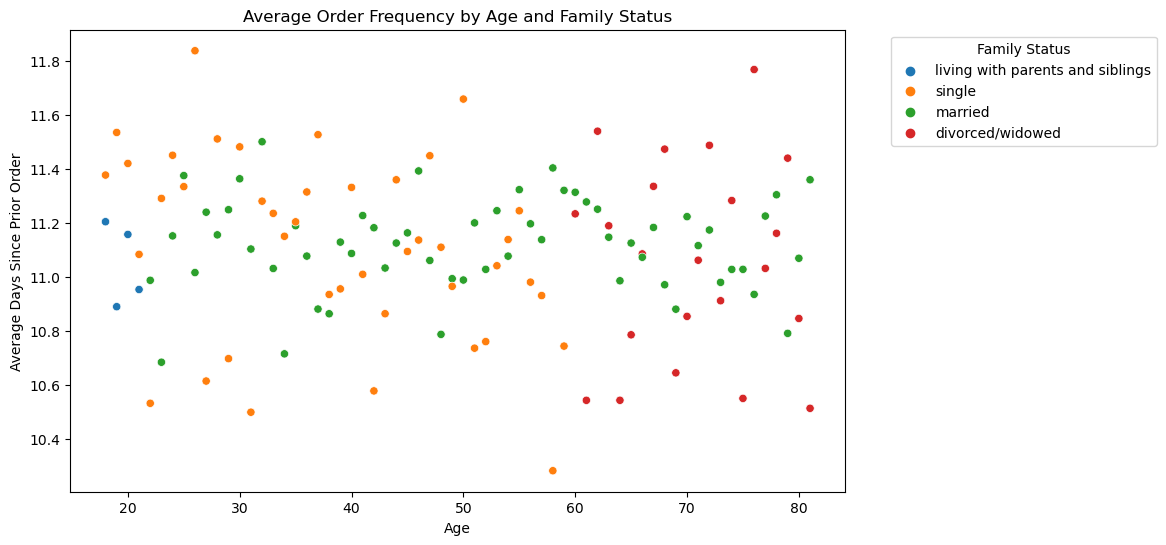

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=age_family_stats, x='age', y='days_since_prior_order', hue='family_status')
plt.title('Average Order Frequency by Age and Family Status')
plt.xlabel('Age')
plt.ylabel('Average Days Since Prior Order')
plt.legend(title='Family Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

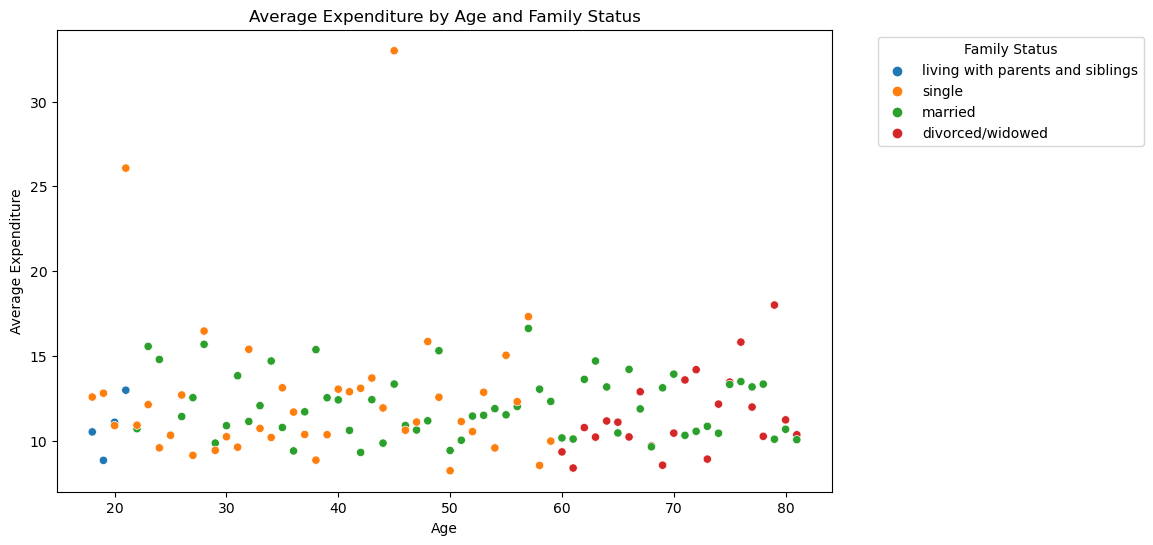

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=age_family_stats, x='age', y='prices', hue='family_status')
plt.title('Average Expenditure by Age and Family Status')
plt.xlabel('Age')
plt.ylabel('Average Expenditure')
plt.legend(title='Family Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

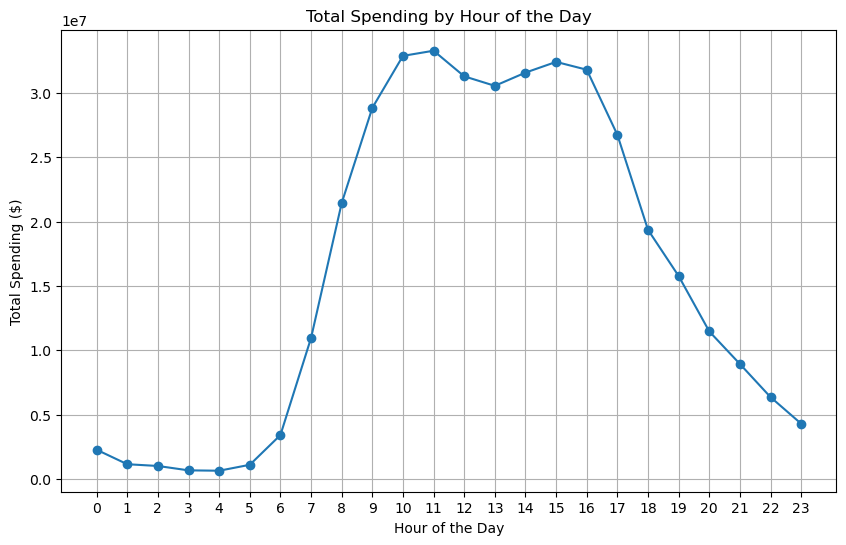

In [17]:
# Aggregate data by hour of the day and calculate total spending
hourly_spending = df.groupby('order_hour_of_day')['prices'].sum()

# Visualize data using a line plot
plt.figure(figsize=(10, 6))
hourly_spending.plot(marker='o')
plt.title('Total Spending by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Spending ($)')
plt.grid(True)
plt.xticks(range(24))  # Set x-axis ticks to show all hours of the day
plt.show()

In [18]:
# Group data by loyalty status and department and calculate relevant metrics
loyalty_department_stats = df.groupby(['loyalty_flag', 'department']).agg({
    'order_id': 'count',  # Total number of orders
    'prices': 'sum'       # Total spending
}).reset_index()

# Optionally, you can calculate additional metrics such as average order size

# Print the aggregated statistics
print(loyalty_department_stats)


        loyalty_flag     department  order_id      prices
0     Loyal customer        alcohol     38723    315957.3
1     Loyal customer         babies    167108   1262866.3
2     Loyal customer         bakery    379873   2994648.5
3     Loyal customer      beverages    855017   6593016.0
4     Loyal customer      breakfast    221577   1778846.8
..               ...            ...       ...         ...
58  Regular customer         pantry    922727   7373323.9
59  Regular customer  personal care    225499   1802865.5
60  Regular customer           pets     51711    408647.2
61  Regular customer        produce   4595293  36727519.5
62  Regular customer         snacks   1410149   6035369.3

[63 rows x 4 columns]


In [19]:
pd.set_option('display.max_row', None)

In [20]:
loyalty_department_stats

loyalty_flag       department  order_id      prices
0     Loyal customer          alcohol     38723    315957.3
1     Loyal customer           babies    167108   1262866.3
2     Loyal customer           bakery    379873   2994648.5
3     Loyal customer        beverages    855017   6593016.0
4     Loyal customer        breakfast    221577   1778846.8
5     Loyal customer             bulk     13834    114890.6
6     Loyal customer     canned goods    294594   2244417.7
7     Loyal customer       dairy eggs   1830707  42171178.6
8     Loyal customer             deli    324046   2539630.3
9     Loyal customer  dry goods pasta    242580   1781981.9
10    Loyal customer           frozen    609460   4670451.9
11    Loyal customer        household    196873   1444148.0
12    Loyal customer    international     78394    599437.3
13    Loyal customer     meat seafood    202480   3300634.1
14    Loyal customer          missing     18350    157433.9
15    Loyal customer            other     10715     72252.7
16    Loyal customer           pantry    560402   4533079.6
17    Loyal customer    personal care    123365    988781.1
18    Loyal customer             pets     25469    199741.8
19    Loyal customer          produce   3147376  25023814.1
20    Loyal customer           snacks    943150   4026833.7
21      New customer          alcohol     37698    306614.4
22      New customer           babies     60118    466215.0
23      New customer           bakery    223704   1744769.9
24      New customer        beverages    512871   3913908.5
25      New customer        breakfast    138362   1107297.0
26      New customer             bulk      5271     44030.1
27      New customer     canned goods    236180   1761699.3
28      New customer       dairy eggs    971621  42375630.9
29      New customer             deli    205750   1585499.3
30      New customer  dry goods pasta    189327   1397585.3
31      New customer           frozen    485283   3778499.6
32      New customer        household    166926   1245528.2
33      New customer    international     57103    440507.3
34      New customer     meat seafood    146610   2383002.7
35      New customer          missing     17090    147433.4
36      New customer            other      7719     56390.4
37      New customer           pantry    392240   3114257.3
38      New customer    personal care     98708    787483.3
39      New customer             pets     20536    162499.4
40      New customer          produce   1736622  13909600.9
41      New customer           snacks    534251   2283335.0
42  Regular customer          alcohol     77275    629082.6
43  Regular customer           babies    196576   1508079.3
44  Regular customer           bakery    568851   4468607.6
45  Regular customer        beverages   1320235  10139210.6
46  Regular customer        breakfast    343094   2758482.2
47  Regular customer             bulk     15468    129727.9
48  Regular customer     canned goods    537284   4047015.0
49  Regular customer       dairy eggs   2596419  96200717.8
50  Regular customer             deli    521453   4052222.2
51  Regular customer  dry goods pasta    434720   3190386.4
52  Regular customer           frozen   1140000   8840255.3
53  Regular customer        household    374867   2764676.5
54  Regular customer    international    133756   1028528.1
55  Regular customer     meat seafood    359837   5867933.5
56  Regular customer          missing     33705    293977.9
57  Regular customer            other     17857    125064.9
58  Regular customer           pantry    922727   7373323.9
59  Regular customer    personal care    225499   1802865.5
60  Regular customer             pets     51711    408647.2
61  Regular customer          produce   4595293  36727519.5
62  Regular customer           snacks   1410149   6035369.3

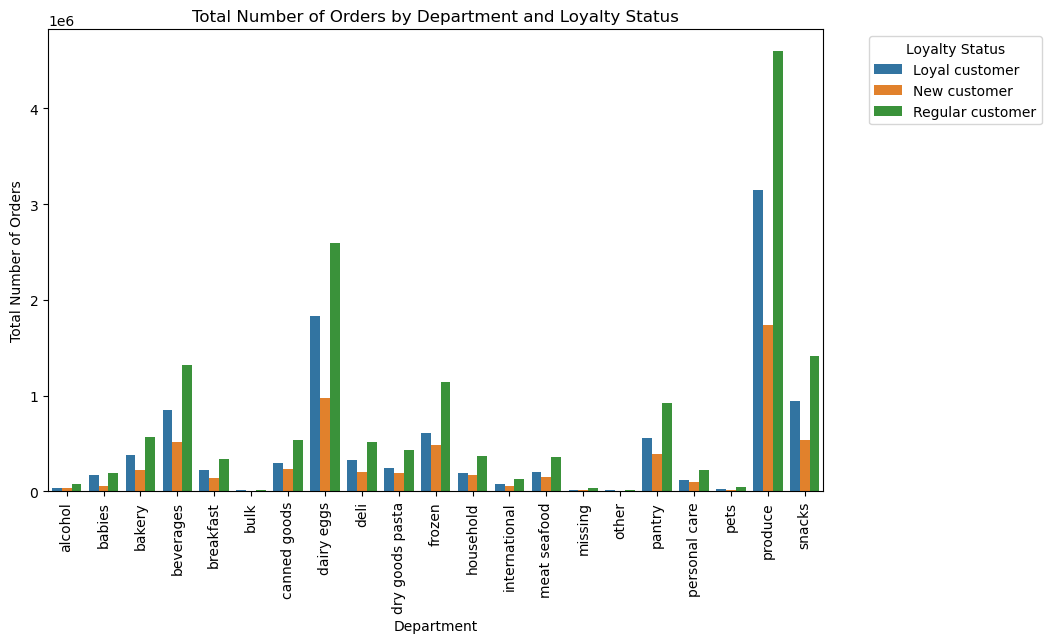

In [21]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=loyalty_department_stats, x='department', y='order_id', hue='loyalty_flag')
plt.title('Total Number of Orders by Department and Loyalty Status')
plt.xlabel('Department')
plt.ylabel('Total Number of Orders')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Loyalty Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [22]:
# Group data by loyalty status and department and calculate relevant metrics
family_group_department_stats = df.groupby(['family_group', 'department']).agg({
    'order_id': 'count',  # Total number of orders
    'prices': 'sum'       # Total spending
}).reset_index()

# Optionally, you can calculate additional metrics such as average order size

# Print the aggregated statistics
print(family_group_department_stats)


                                       family_group       department  \
0                                    Large Families          alcohol   
1                                    Large Families           babies   
2                                    Large Families           bakery   
3                                    Large Families        beverages   
4                                    Large Families        breakfast   
5                                    Large Families             bulk   
6                                    Large Families     canned goods   
7                                    Large Families       dairy eggs   
8                                    Large Families             deli   
9                                    Large Families  dry goods pasta   
10                                   Large Families           frozen   
11                                   Large Families        household   
12                                   Large Families    internati

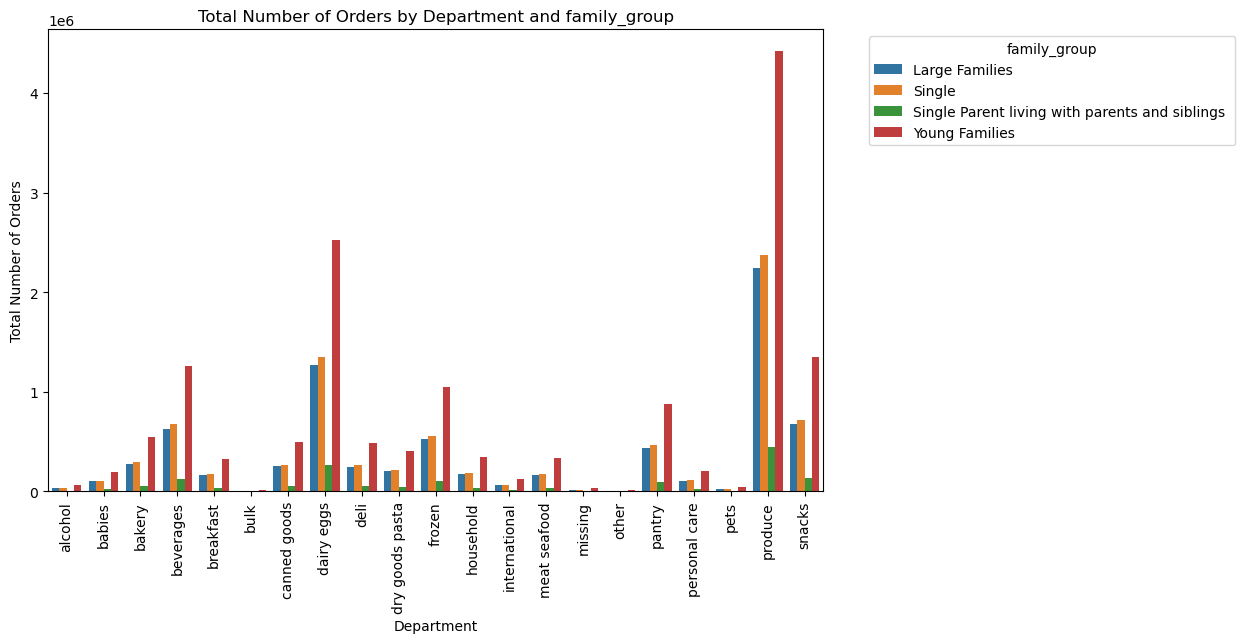

In [23]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=family_group_department_stats, x='department', y='order_id', hue='family_group')
plt.title('Total Number of Orders by Department and family_group')
plt.xlabel('Department')
plt.ylabel('Total Number of Orders')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='family_group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [35]:
popular_departments = df.groupby('department')['order_number'].mean()

In [36]:
print(popular_departments)

department
alcohol            15.215751
babies             19.310397
bakery             17.170395
beverages          17.225802
breakfast          16.773669
bulk               20.197148
canned goods       16.165037
dairy eggs         17.665606
deli               16.473447
dry goods pasta    15.895474
frozen             15.457838
household          15.694469
international      16.439806
meat seafood       15.887671
missing            22.902379
other              17.277920
pantry             16.583536
personal care      16.170638
pets               15.340650
produce            17.811403
snacks             17.177343
Name: order_number, dtype: float64


In [29]:
df['department_id'].head()

0     7.0
1    16.0
2    19.0
3    19.0
4    17.0
Name: department_id, dtype: float64

In [38]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=popular_departments, x='department', y='order_id')
plt.title('Total Number of Orders by Department and family_group')
plt.xlabel('Department')
plt.ylabel('Total Number of Orders')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='family_group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

ValueError: Could not interpret input 'department'

<Figure size 1000x600 with 0 Axes>

In [43]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=popular_departments, x='department', y='order_id')
plt.title('Total Number of Orders by Department')
plt.xlabel('Department')
plt.ylabel('Total Number of Orders')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# plt.legend(title='family_group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

ValueError: Could not interpret input 'department'

<Figure size 1000x600 with 0 Axes>

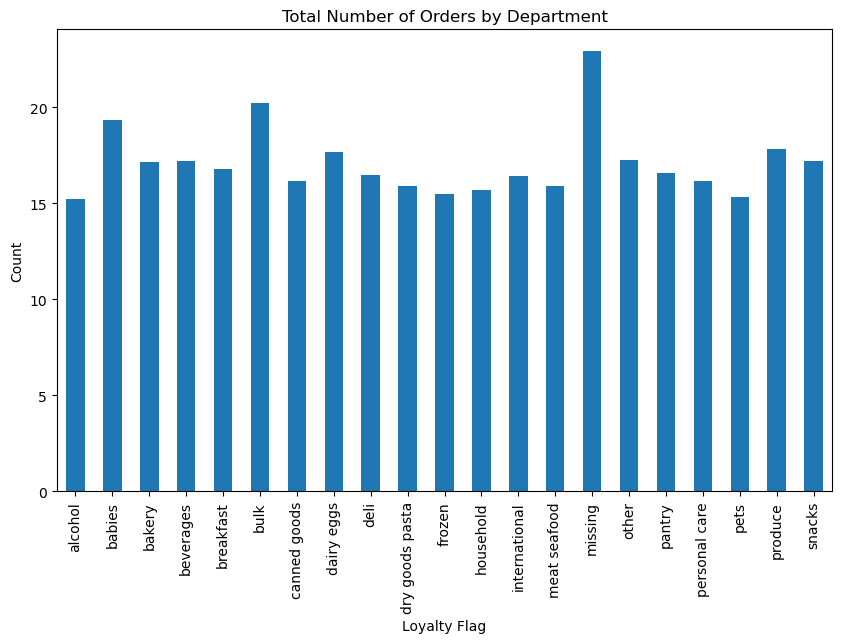

In [42]:
# Plot the distribution of loyalty flags
popular_departments.plot(kind='bar', figsize=(10, 6))
plt.title('Total Number of Orders by Department')
plt.xlabel('Loyalty Flag')
plt.ylabel('Count')
plt.xticks(rotation=90)
# plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_counts.png'))
plt.show()

In [45]:
df.shape

(32435059, 37)